In [29]:
import pandas as pd
import lxml
from matplotlib import pyplot
import plotly.express as px

In [82]:
beer = pd.read_html('https://homebrewacademy.com/beer-alcohol-content-list/')

In [83]:
print(f'Total tables: {len(beer)}')

Total tables: 2


In [84]:
df = beer[0]
df['ABV'] = df['ABV'].str[:-1]
df['ABV'] = df['ABV'].astype('float')
df.head()

,Brand,Calories,ABV
0,Abita Amber,128,4.5
1,Abita Golden,125,4.2
2,Abita Jockamo IPA,190,6.5
3,Abita Light,118,4.0
4,Abita Purple Haze,128,4.2


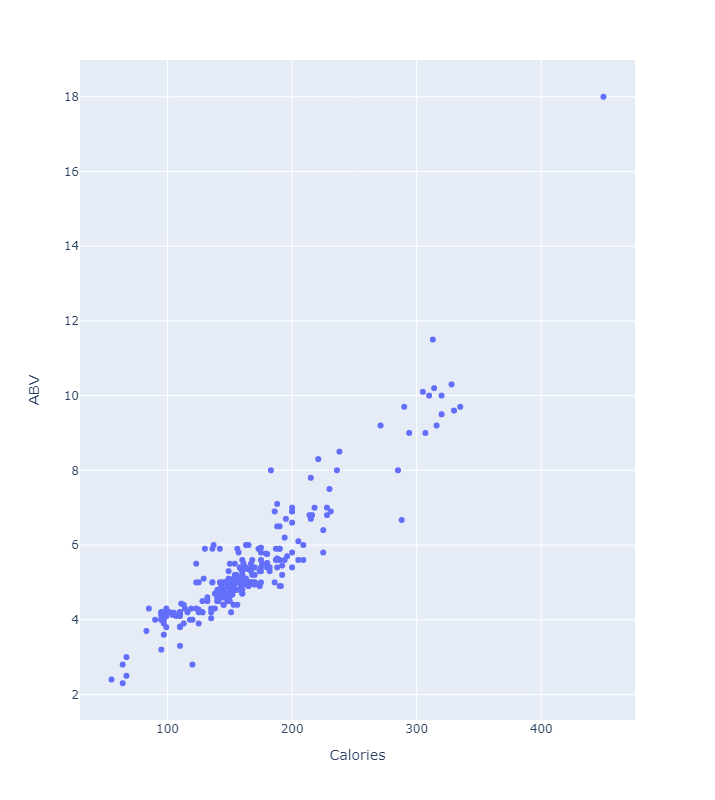

In [85]:
fig = px.scatter(df, x="Calories", y="ABV",  hover_data=['Brand'],
                width=800, height=800)
fig.show()

In [86]:
df['apc'] = df['ABV']/df['Calories']
df = df.sort_values(['apc'],ascending=False)

In [89]:
df.head(30)

,Brand,Calories,ABV,apc
136,Michelob Ultra Pure Gold,85,4.30,0.050588
153,Natural Ice,130,5.90,0.045385
149,Molson Canadian 67,67,3.00,0.044776
33,Bud Ice,123,5.50,0.044715
193,Rolling Rock Green Light,83,3.70,0.044578
52,Corona Premier,90,4.00,0.044444
154,Natural Light,95,4.20,0.044211
133,Michelob Ultra,95,4.20,0.044211
37,Bud Light Platinum,137,6.00,0.043796
142,Miller Lite,96,4.20,0.043750
